In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
mnist=tfds.load('mnist',split=tfds.Split.TRAIN)
mnist_list=list(tfds.as_numpy(mnist))
x_data,y_data=[],[]
for example in mnist_list:
    x_data.append(example['image'])
    y_data.append(example['label'])
x_train=np.asarray(x_data,dtype=np.float32)
y_data=np.asarray(y_data,dtype=np.int32)
y_train=tf.one_hot(y_data,depth=10)
y_train=np.asarray(y_train,dtype=np.float32)

In [3]:
mnist=tfds.load('mnist',split=tfds.Split.TEST)
mnist_list=list(tfds.as_numpy(mnist))
x_data,y_data=[],[]
for example in mnist_list:
    x_data.append(example['image'])
    y_data.append(example['label'])
x_test=np.asarray(x_data,dtype=np.float32)
y_data=np.asarray(y_data,dtype=np.int32)
y_test=tf.one_hot(y_data,depth=10)
y_test=np.asarray(y_test,dtype=np.float32)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
y_train.shape

(60000, 10)

In [6]:
sample=np.reshape(x_train[5677],(28,28))

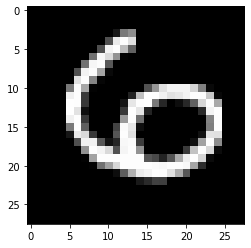

In [7]:
plt.imshow(sample,cmap='gray')

In [8]:
y_train[5677]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
def init_weights(shape):
    init_weights_vals=tf.compat.v1.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_weights_vals)

In [10]:
def init_bias(shape):
    init_bias_vals=tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

In [11]:
def con2d(input_data,shape):
    return tf.nn.conv2d(input_data,shape,strides=[1,1,1,1],padding='SAME')

In [12]:
def pooling_max2by2(input_data):
    return tf.nn.max_pool2d(input_data,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [13]:
def convolution_layer(input_data,shape):
    weight=init_weights(shape)
    bias=init_bias([shape[3]])
    return tf.nn.relu(con2d(input_data,weight)+bias)

In [14]:
def normal_layer(input_data,size):
    input_size=input_data.get_shape()[1]
    weight=init_weights([input_size,size])
    bias=init_bias([size])
    return tf.matmul(input_data,weight)+bias

In [15]:
tf.compat.v1.disable_eager_execution()

In [16]:
x=tf.compat.v1.placeholder(tf.float32,shape=[None,728])
y_true=tf.compat.v1.placeholder(tf.float32,shape=[None,10])
hold_prob=tf.compat.v1.placeholder(tf.float32)

In [17]:
x_image=tf.reshape(x,shape=(-1,28,28,1))

In [18]:
x_image

<tf.Tensor 'Reshape:0' shape=(None, 28, 28, 1) dtype=float32>

In [31]:
con_1=convolution_layer(x_image,[3,3,1,16])
max_pool_1=pooling_max2by2(con_1)

con_2=convolution_layer(max_pool_1,[3,3,16,32])
max_pool_2=pooling_max2by2(con_2)

con_3=convolution_layer(max_pool_2,[3,3,32,64])
max_pool_3=pooling_max2by2(con_3)
'''
convo_4=convolution_layer(convo_3_pooling,shape=[5,5,128,256])
convo_4_pooling=pooling_max2by2(convo_4)'''

'\nconvo_4=convolution_layer(convo_3_pooling,shape=[5,5,128,256])\nconvo_4_pooling=pooling_max2by2(convo_4)'

In [32]:
max_pool_3

<tf.Tensor 'MaxPool2d_5:0' shape=(None, 4, 4, 64) dtype=float32>

In [51]:
convo_flatten=tf.reshape(max_pool_3,shape=(-1,4*4*64))
normal_flatten_layer=tf.nn.relu(normal_layer(convo_flatten,1024))

In [67]:
dropout_layer=tf.nn.dropout(normal_flatten_layer,rate=hold_prob)

In [68]:
normal_layer

<function __main__.normal_layer(input_data, size)>

In [69]:
y_pred=normal_layer(dropout_layer,10)

In [70]:
y_pred

<tf.Tensor 'add_15:0' shape=(None, 10) dtype=float32>

In [75]:
#cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))
cross_entropy=tf.reduce_mean(tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred)))

In [76]:
optimize=tf.compat.v1.train.AdamOptimizer(learning_rate=0.00001)
train=optimize.minimize(cross_entropy)

In [77]:
init=tf.compat.v1.global_variables_initializer()

In [78]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    batch=1000
    for i in range(batch):
        #import pdb; pdb.set_trace()
        rand_int=np.random.randint(len(x_train),size=100)
        sess.run(train,feed_dict={x_image:x_train[rand_int],y_true:y_train[rand_int],hold_prob:0.5})
        if i%100==0:
            print("step:{}".format(i))
            print("Accuracy: ")
            matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc=tf.reduce_mean(tf.cast(matches,dtype=tf.float32))
            print(sess.run(acc,feed_dict={x_image:x_test,y_true:y_test,hold_prob:1.0}))
            

step:0
Accuracy: 
0.098
step:100
Accuracy: 
0.098
step:200
Accuracy: 
0.098
step:300
Accuracy: 
0.098
step:400
Accuracy: 
0.098
step:500
Accuracy: 
0.098
step:600
Accuracy: 
0.098
step:700
Accuracy: 
0.098
step:800
Accuracy: 
0.098
step:900
Accuracy: 
0.098


In [79]:
x_test.shape

(10000, 28, 28, 1)

In [5]:
import tensorflow as tf

In [71]:
t = tf.constant([[[1, 1, 1], [2, 2, 2],[7,7,7]],
                 [[3, 3, 3], [4, 4, 4],[8,8,8]],
                 [[5, 5, 5], [6, 6, 6],[9,9,9]]])

In [32]:
t

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[1, 1, 1],
        [2, 2, 2]],

       [[3, 3, 3],
        [4, 4, 4]],

       [[5, 5, 5],
        [6, 6, 6]]], dtype=int32)>

In [46]:

tf.strided_slice(t, [1, 0, 0], [2, 1,3], [1, 2, 1])  # [[[3, 3, 3]]]

<tf.Tensor: shape=(1, 1, 3), dtype=int32, numpy=array([[[3, 3, 3]]], dtype=int32)>

In [55]:

tf.strided_slice(t, [1, 0, 0], [2, 3, 3], [1, 1, 1])  # [[[3, 3, 3],
                                                      #   [4, 4, 4]]]

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[3, 3, 3],
        [4, 4, 4]]], dtype=int32)>

In [67]:

tf.strided_slice(t, [1, -2, 0], [2, 1, 3], [1, 1, 1])  # [[[4, 4, 4],
                                                         #   [3, 3, 3]]]

<tf.Tensor: shape=(1, 1, 0), dtype=int32, numpy=array([], shape=(1, 1, 0), dtype=int32)>

In [77]:

tf.strided_slice(t, [1, -1, 0], [4, -3, 3], [1, -1, 1])  # [[[4, 4, 4],
                                                         #   [3, 3, 3]]]

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[8, 8, 8],
        [4, 4, 4]],

       [[9, 9, 9],
        [6, 6, 6]]], dtype=int32)>

In [80]:
tf.fill([5,1],'<SOS>')

<tf.Tensor: shape=(5, 1), dtype=string, numpy=
array([[b'<SOS>'],
       [b'<SOS>'],
       [b'<SOS>'],
       [b'<SOS>'],
       [b'<SOS>']], dtype=object)>